<a href="https://colab.research.google.com/github/Naveen-DS08/Deep_Learning/blob/main/CNN/Potato_Leaf_Disease_Classification/Potato_Disease_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [ ]:
# Initializing basic parameter

image_width = image_height = 256
batches = 32
channels = 3
epoch_size = 50

In [ ]:
# Input shape

input_shape = (batches, image_height, image_width, channels)
input_shape

(32, 256, 256, 3)

In [ ]:
# Importing the dataset

dataset = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Data_Science/Deep_Learning/Projects/Potato_Disease_Classificaton/Potato_Image_Dataset',
        )

Found 2152 files belonging to 3 classes.


In [ ]:
# Class label initializating

class_label = dataset.class_names
class_label

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Number of classes

n_classes = len(class_label)
n_classes

3

In [ ]:
# length of the dataset with batchsize of 32

len(dataset)

68

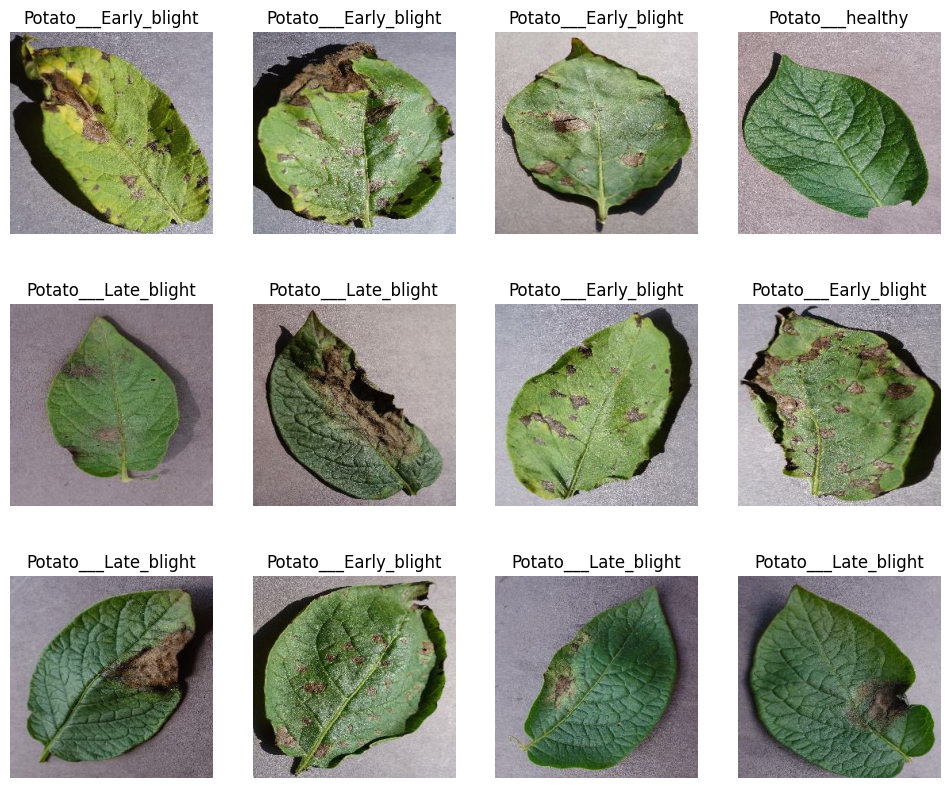

In [ ]:
# Visualizing some of the images

plt.figure(figsize=(12,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_label[label_batch[i]])

In [ ]:
# Creating the function to partition data

def tf_partition_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000 ):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=42)

  train_size = round(ds_size * train_split)
  val_size = round(ds_size * val_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds


In [ ]:
# Spliting the dataset

train_ds, val_ds, test_ds = tf_partition_data(dataset)

In [ ]:
# Length of each data batch

print('Train batch Size : ', len(train_ds))
print('Validation batch Size : ', len(val_ds))
print('Test batch Size : ', len(test_ds))

Train batch Size :  54
Validation batch Size :  7
Test batch Size :  7


In [ ]:
# Optimizing the dataset for faster preformance

train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Initializing Preprocessing layer

image_preprocessing_layer = keras.Sequential([

                              layers.experimental.preprocessing.Resizing(image_height, image_width),
                              layers.experimental.preprocessing.Rescaling(1./255)
                             ])

In [ ]:
# Initializing data augumentation layer

data_augmentation_layer = keras.Sequential([

                          layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                          layers.experimental.preprocessing.RandomRotation(0.2),
                          layers.experimental.preprocessing.RandomZoom(0.2)

])

In [ ]:
# Initializing our whole model

model = models.Sequential([

                           image_preprocessing_layer,
                           data_augmentation_layer,
                           layers.Conv2D(32,kernel_size=(3,3), activation='relu' ),
                           layers.MaxPool2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3), activation='relu' ),
                           layers.MaxPool2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3), activation='relu' ),
                           layers.MaxPool2D((2,2)),
                           layers.Conv2D(128,kernel_size=(3,3), activation='relu' ),
                           layers.MaxPool2D((2,2)),
                           layers.Conv2D(128,kernel_size=(3,3), activation='relu' ),
                           layers.MaxPool2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3), activation='relu' ),
                           layers.MaxPool2D((2,2)),

                           layers.Flatten(),

                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.2),
                           layers.Dense(64, activation='relu'),
                           layers.Dropout(0.2),
                           layers.Dense(32, activation='relu'),
                           layers.Dropout(0.2),
                           layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape=input_shape)

In [ ]:
# Visualizing the our model layers

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
# Compiling our model

model.compile(

              optimizer = keras.optimizers.Adam(),
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
)

In [ ]:
# Training our model

history = model.fit(
                    train_ds,
                    validation_data = val_ds,
                    batch_size= 32,
                    verbose=1,
                    epochs = epoch_size
                  )

Epoch 1/32
54/54 [==============================] - 314s 247ms/step - loss: 0.9616 - accuracy: 0.4413 - val_loss: 0.8931 - val_accuracy: 0.4598
Epoch 2/32
54/54 [==============================] - 3s 62ms/step - loss: 0.9001 - accuracy: 0.5029 - val_loss: 0.7797 - val_accuracy: 0.5179
Epoch 3/32
54/54 [==============================] - 3s 64ms/step - loss: 0.8008 - accuracy: 0.6097 - val_loss: 0.9352 - val_accuracy: 0.5268
Epoch 4/32
54/54 [==============================] - 3s 62ms/step - loss: 0.6868 - accuracy: 0.7107 - val_loss: 0.8227 - val_accuracy: 0.6562
Epoch 5/32
54/54 [==============================] - 3s 61ms/step - loss: 0.5786 - accuracy: 0.7670 - val_loss: 0.3192 - val_accuracy: 0.8884
Epoch 6/32
54/54 [==============================] - 3s 61ms/step - loss: 0.4184 - accuracy: 0.8234 - val_loss: 0.3361 - val_accuracy: 0.8661
Epoch 7/32
54/54 [==============================] - 3s 64ms/step - loss: 0.3676 - accuracy: 0.8568 - val_loss: 0.2213 - val_accuracy: 0.9464
Epoch 8/32

In [ ]:
# Performance of out model on unseen data

test_score = model.evaluate(test_ds)

print(test_score)

7/7 [==============================] - 8s 28ms/step - loss: 0.0332 - accuracy: 0.9821
[0.03317953273653984, 0.9821428656578064]


In [ ]:
history.params

{'verbose': 1, 'epochs': 32, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['accuracy'])

32

In [ ]:
# Creating the dataframe with model performance metrics

import pandas as pd

history_df = pd.DataFrame(history.history )

history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.961600,0.441315,0.893113,0.459821
1,0.900090,0.502934,0.779718,0.517857
2,0.800814,0.609742,0.935236,0.526786
3,0.686828,0.710681,0.822661,0.656250
4,0.578554,0.767019,0.319179,0.888393


<Axes: >

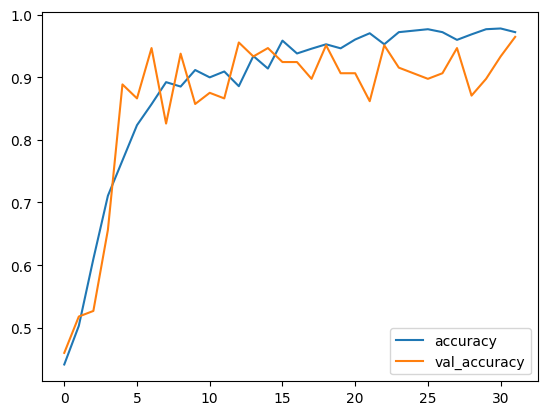

In [ ]:
# Plotting accuracy of our train and validation set

history_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

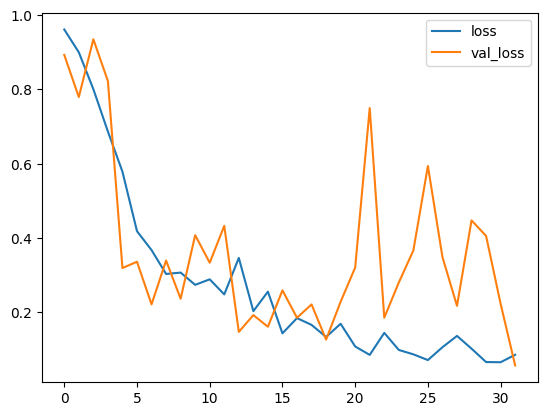

In [ ]:
#  Ploting loss on train and validation set

history_df[['loss', 'val_loss']].plot()

Actual_label :  Potato___Late_blight
1/1 [==============================] - 0s 47ms/step
Predicted Label :  Potato___Late_blight


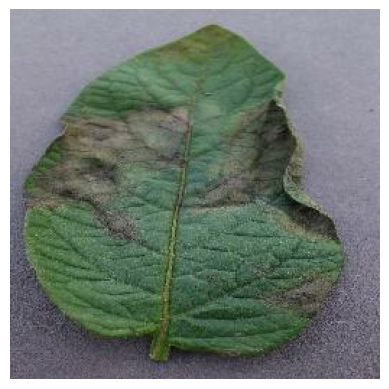

In [ ]:
# Verifying actual vs predicted classes, How our model performs

for image_batch, label_batch in test_ds.take(1):

  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print('Actual_label : ', class_label[first_label])
  plt.axis('off')
  plt.imshow(first_image)

  batch_predicted = model.predict(image_batch)
  predicted = np.argmax(batch_predicted[0])
  print('Predicted Label : ', class_label[predicted])


In [ ]:
#  Saving our for future use

model_version = 1

model.save(f'/content/drive/MyDrive/Data_Science/Deep_Learning/Projects/Potato_Disease_Classificaton/Models/{model_version}')